In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file into a DataFrame
file_path = 'no_lie_for_real_left_off_here.csv'  
data = pd.read_csv(file_path)
# Display the first few rows of the data to confirm
data.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Metascore,imdbRating,Rotten Tomatoes,imdbVotes,BoxOffice
0,Boyhood,2014,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...",10.0,7.9,9.7,"370,906","$25,352,281"
1,Moonlight,2016,R,18 Nov 2016,111.0,Drama,Barry Jenkins,"Barry Jenkins, Tarell Alvin McCraney","Mahershala Ali, Naomie Harris, Trevante Rhodes",A young African-American man grapples with his...,9.9,7.4,9.8,"336,819","$27,854,932"
2,Roma,2018,R,14 Dec 2018,135.0,Drama,Alfonso Cuarón,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",A year in the life of a middle-class family's ...,9.6,7.7,9.6,"171,928",NaN
3,Manchester by the Sea,2016,R,16 Dec 2016,137.0,Drama,Kenneth Lonergan,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler",A depressed uncle is asked to take care of his...,9.6,7.8,9.6,"321,828","$47,695,371"
4,Gravity,2013,PG-13,04 Oct 2013,91.0,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón, Jonás Cuarón","Sandra Bullock, George Clooney, Ed Harris","Dr Ryan Stone, an engineer on her first time o...",9.6,7.7,9.6,"872,078","$274,092,705"


In [2]:
# Drop rows with missing 'Rated' or 'imdbRating' or 'BoxOffice'
data_clean = data.dropna(subset=['Rated', 'imdbRating', 'BoxOffice'])

In [3]:
# Focus on valid MPAA ratings (G, PG, PG-13, R, NC-17)
valid_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']
data_clean = data_clean[data_clean['Rated'].isin(valid_ratings)]

In [4]:
# Convert 'imdbRating' to numeric values (if it's not already)
data_clean['imdbRating'] = pd.to_numeric(data_clean['imdbRating'], errors='coerce')

In [5]:
# Convert 'BoxOffice' to numeric, removing dollar signs and commas
data_clean['BoxOffice'] = data_clean['BoxOffice'].replace({'\$': '', ',': ''}, regex=True)
data_clean['BoxOffice'] = pd.to_numeric(data_clean['BoxOffice'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\JamesElander\AppData\Local\Temp\ipykernel_8868\435932123.py:2: SyntaxWarning: invalid escape sequence '\$'
  data_clean['BoxOffice'] = data_clean['BoxOffice'].replace({'\$': '', ',': ''}, regex=True)


In [6]:
# Display the cleaned data with relevant columns
data_clean[['Title', 'Rated', 'imdbRating', 'BoxOffice']].head()

,Title,Rated,imdbRating,BoxOffice
0,Boyhood,R,7.9,25352281
1,Moonlight,R,7.4,27854932
3,Manchester by the Sea,R,7.8,47695371
4,Gravity,PG-13,7.7,274092705
5,Parasite,R,8.5,53369749


In [7]:
# Set up the seaborn style
sns.set(style="whitegrid")

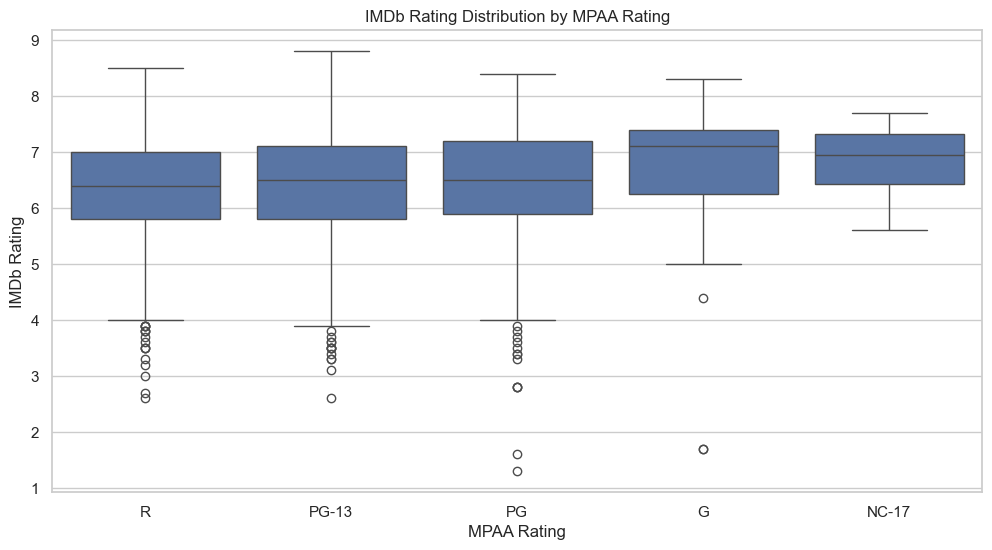

In [8]:
# Plot IMDb Rating comparison across MPAA ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rated', y='imdbRating', data=data_clean)
plt.title('IMDb Rating Distribution by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('IMDb Rating')
plt.show()

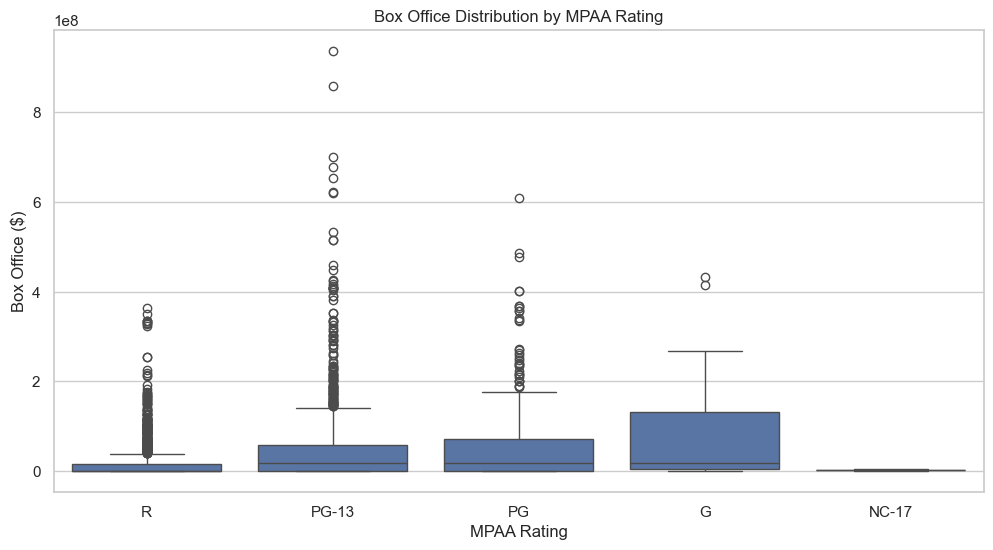

In [9]:
# Plot Box Office comparison across MPAA ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rated', y='BoxOffice', data=data_clean)
plt.title('Box Office Distribution by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Box Office ($)')
plt.show()

In [14]:
# Calculate the average IMDb rating and Box Office for each 'Rated' category
average_scores = data_clean.groupby('Rated')[['imdbRating', 'BoxOffice']].mean()

In [15]:
print(average_scores)

       imdbRating     BoxOffice
Rated                          
G        6.577419  7.642490e+07
NC-17    6.800000  2.063515e+06
PG       6.400480  5.630694e+07
PG-13    6.414105  5.412022e+07
R        6.357221  1.750853e+07


In [16]:
correlation = data_clean[['imdbRating', 'BoxOffice']].corr()
print(correlation)

            imdbRating  BoxOffice
imdbRating    1.000000   0.211762
BoxOffice     0.211762   1.000000
